In [9]:
import numpy as np
import scipy
import librosa, librosa.display
print(librosa.__version__)
import matplotlib.pyplot as plt
#render plot option - matplotlib inline or matplotlib notebook or matplotlib nbagg
%matplotlib widget
#select a different color-scheme for the plots
import matplotlib.style as ms
ms.use("seaborn-v0_8")  
import IPython.display as Ipd

0.10.1


(425472,)
9.648


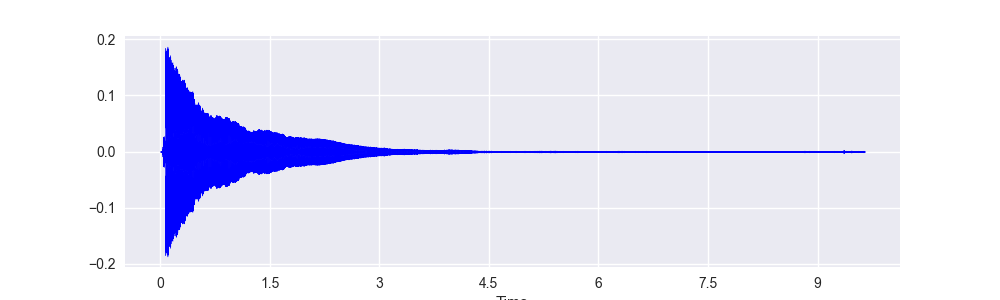

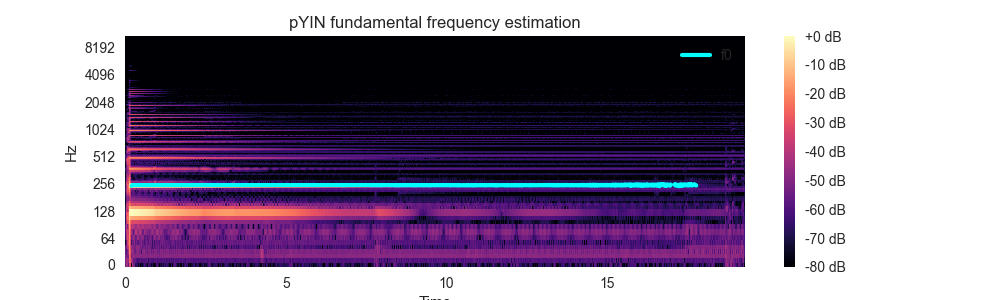

In [21]:
sample_name = 'G4-static'
filepath = f'data-processed/{sample_name}/{sample_name}-sound-0.wav'
sr = 44100 # sampling rate
static_signal, sr = librosa.load(filepath, sr=sr, mono=False)
print(static_signal.shape)
print('{:2.3f}'.format(librosa.samples_to_time(static_signal.shape[0], sr=sr)))
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y=static_signal, sr=sr, color="blue")

f0, voiced_flag, voiced_probs = librosa.pyin(static_signal,
                                             sr=sr,
                                             fmin=librosa.note_to_hz('D2'),
                                             fmax=librosa.note_to_hz('C7'),
                                            frame_length=512)
times = librosa.times_like(f0, sr=sr)
D = librosa.amplitude_to_db(np.abs(librosa.stft(static_signal)), ref=np.max)

fig, ax = plt.subplots(figsize=(10,3))
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax, hop_length=512)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

Ipd.Audio(static_signal, rate=sr) # play audio

(427008,)
9.683


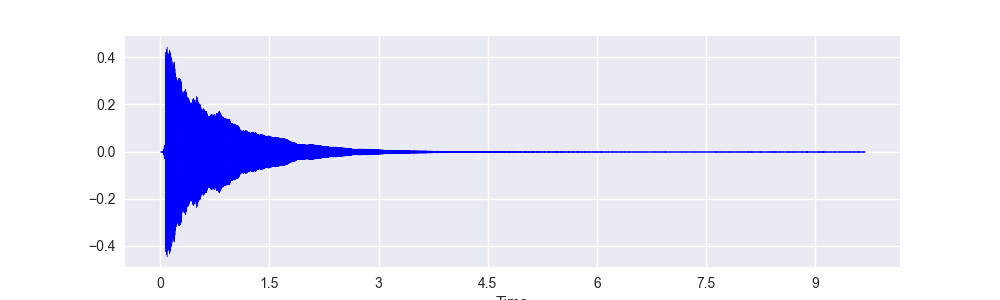

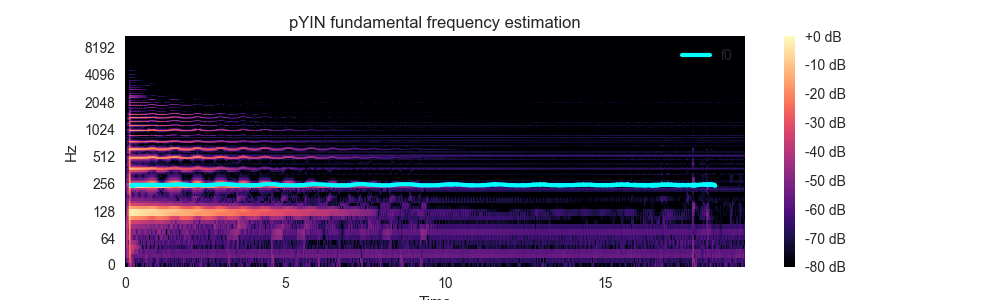

In [11]:
sample_name = 'G4-vertical'
filepath = f'data-processed/{sample_name}/{sample_name}-sound-0.wav'
sr = 44100 # sampling rate
vertical_signal, sr = librosa.load(filepath, sr=sr, mono=False)
print(vertical_signal.shape)
print('{:2.3f}'.format(librosa.samples_to_time(vertical_signal.shape[0], sr=sr)))
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y=vertical_signal, sr=sr, color="blue")

f0, voiced_flag, voiced_probs = librosa.pyin(vertical_signal,
                                             sr=sr,
                                             fmin=librosa.note_to_hz('D2'),
                                             fmax=librosa.note_to_hz('C7'),
                                            frame_length=512)
times = librosa.times_like(f0, sr=sr)
D = librosa.amplitude_to_db(np.abs(librosa.stft(vertical_signal)), 
                            ref=np.max)

fig, ax = plt.subplots(figsize=(10,3))
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax, hop_length=512)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

Ipd.Audio(vertical_signal, rate=sr) # play audio

(424448,)
9.625


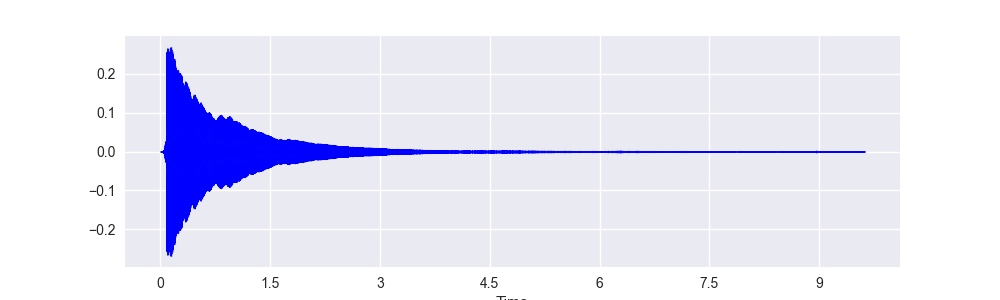

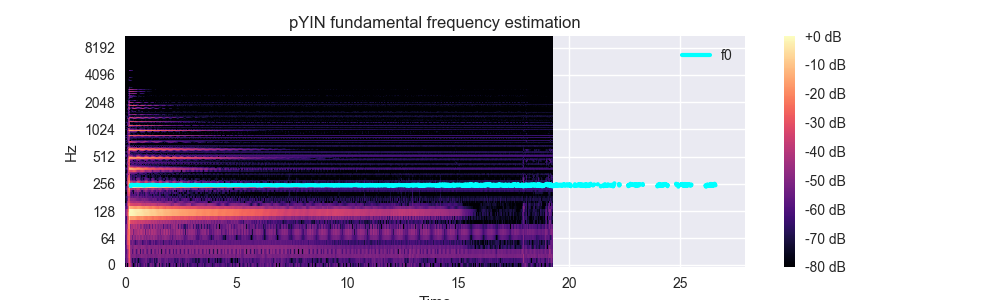

In [31]:
sample_name = 'G4-horizontal'
filepath = f'data-processed/{sample_name}/{sample_name}-sound-2.wav'
sr = 44100 # sampling rate
horizontal_signal, sr = librosa.load(filepath, sr=sr, mono=False)
print(horizontal_signal.shape)
print('{:2.3f}'.format(librosa.samples_to_time(horizontal_signal.shape[0], sr=sr)))
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y=horizontal_signal, sr=sr, color="blue")

f0, voiced_flag, voiced_probs = librosa.pyin(horizontal_signal,
                                             sr=sr,
                                             fmin=librosa.note_to_hz('D2'),
                                             fmax=librosa.note_to_hz('C7'),
                                             frame_length=512)
times = librosa.times_like(f0, sr=sr)
D = librosa.amplitude_to_db(np.abs(librosa.stft(horizontal_signal)), ref=np.max)

fig, ax = plt.subplots(figsize=(10,3))
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax, hop_length=512)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

Ipd.Audio(horizontal_signal, rate=sr) # play audio

(422912,)
9.590


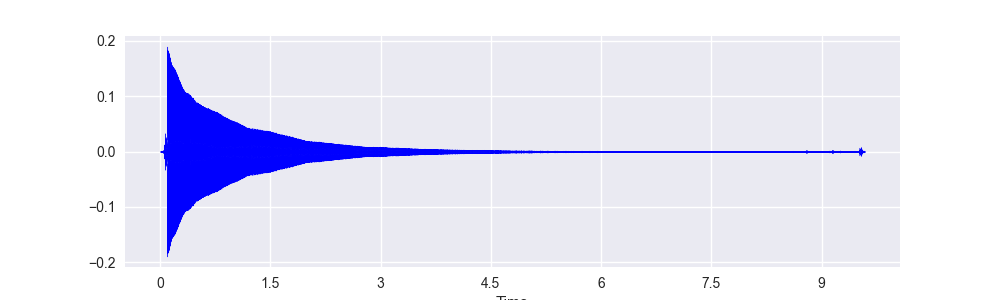

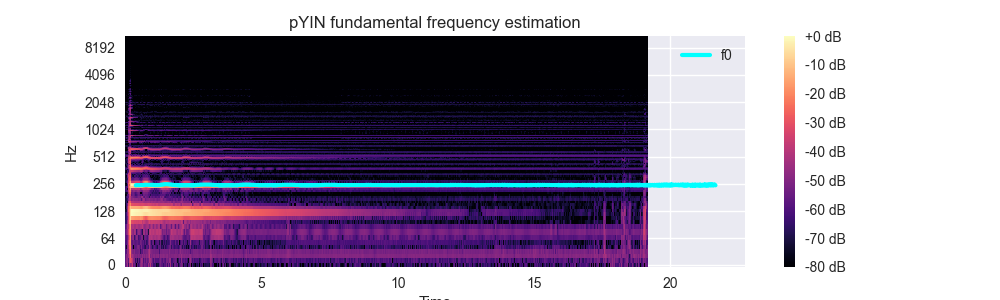

In [22]:
sample_name = 'G4-circular'
filepath = f'data-processed/{sample_name}/{sample_name}-sound-0.wav'
sr = 44100 # sampling rate
circular_signal, sr = librosa.load(filepath, sr=sr, mono=False)
print(circular_signal.shape)
print('{:2.3f}'.format(librosa.samples_to_time(circular_signal.shape[0], sr=sr)))
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y=circular_signal, sr=sr, color="blue")

f0, voiced_flag, voiced_probs = librosa.pyin(circular_signal,
                                             sr=sr,
                                             fmin=librosa.note_to_hz('D2'),
                                             fmax=librosa.note_to_hz('C7'),
                                            frame_length=512)
times = librosa.times_like(f0, sr=sr)
D = librosa.amplitude_to_db(np.abs(librosa.stft(circular_signal)), ref=np.max)

fig, ax = plt.subplots(figsize=(10,3))
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax, hop_length=512)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

Ipd.Audio(circular_signal, rate=sr) # play audio

Text(0.5, 1.0, 'Circular vibrato')

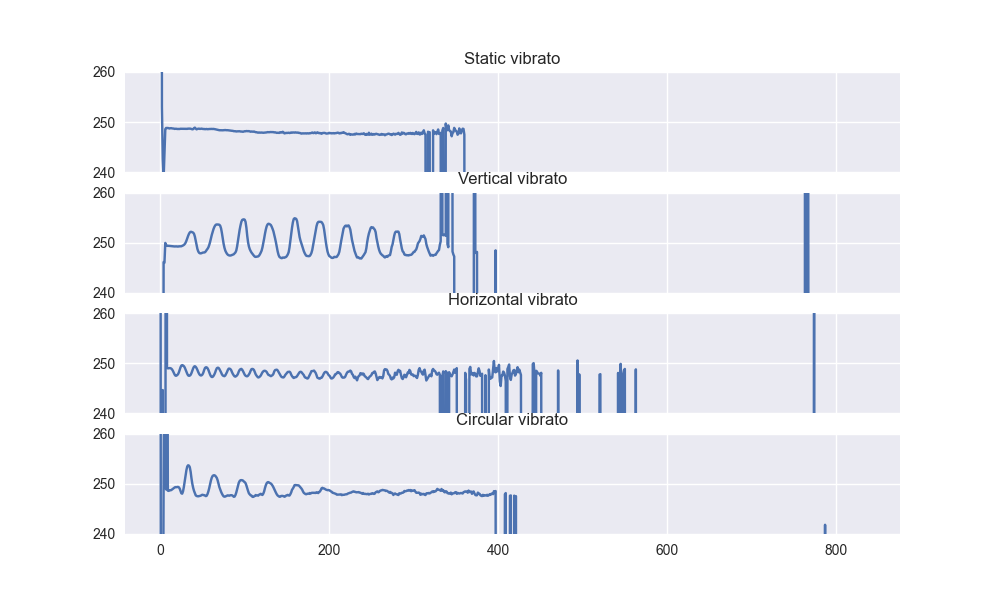

In [98]:
import pandas as pd

frame_length=2048

freq_static = librosa.yin(static_signal, sr=sr, fmin=50, 
                          fmax=880, frame_length=frame_length)
rms_static = librosa.feature.rms(y=static_signal)
rolling_mean = pd.Series(freq).rolling(window=20).mean()
rolling_std = pd.Series(freq).rolling(window=20).std()

freq_vertical = librosa.yin(vertical_signal, sr=sr, fmin=50, 
                            fmax=880, frame_length=frame_length)
freq_horizontal = librosa.yin(horizontal_signal, sr=sr, fmin=50, 
                              fmax=880, frame_length=frame_length)
freq_circular = librosa.yin(circular_signal, sr=sr, fmin=50, 
                            fmax=880, frame_length=frame_length)

fig, ax = plt.subplots(4, figsize=(10,6), sharex=True)
ax[0].plot(freq_static)
ax[0].set_ylim([240, 260])
ax[0].set_title("Static vibrato")
ax[1].plot(freq_vertical)
ax[1].set_ylim([240, 260])
ax[1].set_title("Vertical vibrato")
ax[2].plot(freq_horizontal)
ax[2].set_ylim([240, 260])
ax[2].set_title("Horizontal vibrato")
ax[3].plot(freq_circular)
ax[3].set_ylim([240, 260])
ax[3].set_title("Circular vibrato")
